In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import os
import numpy as np
import glob
import scipy
import seaborn

In [2]:
# uni = "20221024_cf_test"
# uni = "202211101_relu_add_mean_pool_k10"
# uni = "202211101_relu_add_mean_pool_7000"
# uni = "202211107_model_6_3_20000_2048_1to10_1563"
uni = "202211107_model_6_3_20000_2048_1to10_cf"
# uni = "202211107_model_6_3_20000_2048_1to10_1563_2"
# uni = "202211101_model6_1to10_E_"
geo = 1 ## 1 jsns2 / 2 cylinder / 3 sphere

# path = "/users/yewzzang/work/JSNS2_vertex/result/" + uni +"*/train.csv"
# train_path = glob.glob(path)
# train_list = [file for file in train_path if file.endswith(".csv")]


path = "/users/yewzzang/work/JSNS2_vertex/result/*"+uni +"*/*"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

In [3]:
df = pd.read_csv(pred_list[0])

In [4]:
pred = np.array(df['prediction']).reshape(-1,3)
pred

array([[ 0.75061077, -0.97924697,  1.15797675],
       [ 0.85170722,  0.78767163,  1.23668528],
       [ 0.9387641 ,  0.8854965 ,  1.20394075],
       ...,
       [ 1.31055892,  1.11982262,  0.8375929 ],
       [ 0.05111051,  1.17130923,  1.25818753],
       [ 0.93836939, -0.20241757,  1.11945903]])

In [5]:
label = np.array(df['label']).reshape(-1,3)
label

array([[ 0.        ,  0.        , -1.21599996],
       [ 0.        ,  0.        , -1.21599996],
       [ 0.        ,  0.        , -1.21599996],
       ...,
       [ 0.        ,  0.        , -1.21599996],
       [ 0.        ,  0.        , -1.21599996],
       [ 0.        ,  0.        , -1.21599996]])

In [21]:
jade = np.array(df['jade']).reshape(-1,3)
jade

KeyError: 'jade'

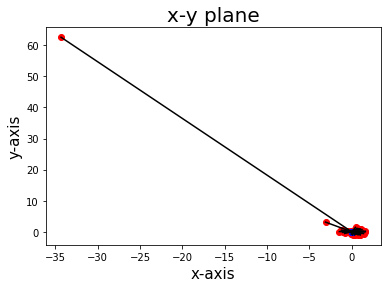

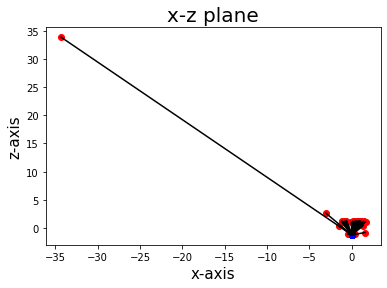

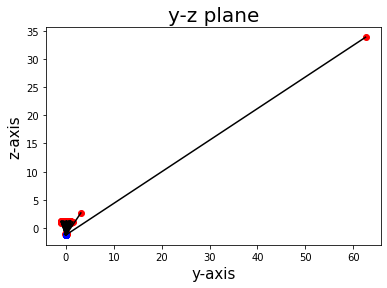

In [7]:
plt.scatter(pred[:50,0],pred[:50,1],color='r')
plt.scatter(label[:50,0],label[:50,1],color='b')
for i in range(50):
    plt.plot([pred[i,0],label[i,0]],[pred[i,1],label[i,1]],'k-')
plt.title('x-y plane',fontsize=20)
plt.xlabel('x-axis',fontsize=15)
plt.ylabel('y-axis',fontsize=15)
plt.show()

plt.scatter(pred[:50,0],pred[:50,2],color='r')
plt.scatter(label[:50,0],label[:50,2],color='b')
for i in range(50):
    plt.plot([pred[i,0],label[i,0]],[pred[i,2],label[i,2]],'k-')
plt.title('x-z plane',fontsize=20)
plt.xlabel('x-axis',fontsize=15)
plt.ylabel('z-axis',fontsize=15)
plt.show()

plt.scatter(pred[:50,1],pred[:50,2],color='r')
plt.scatter(label[:50,1],label[:50,2],color='b')
for i in range(50):
    plt.plot([pred[i,1],label[i,1]],[pred[i,2],label[i,2]],'k-')
plt.title('y-z plane',fontsize=20)
plt.xlabel('y-axis',fontsize=15)
plt.ylabel('z-axis',fontsize=15)
plt.show()




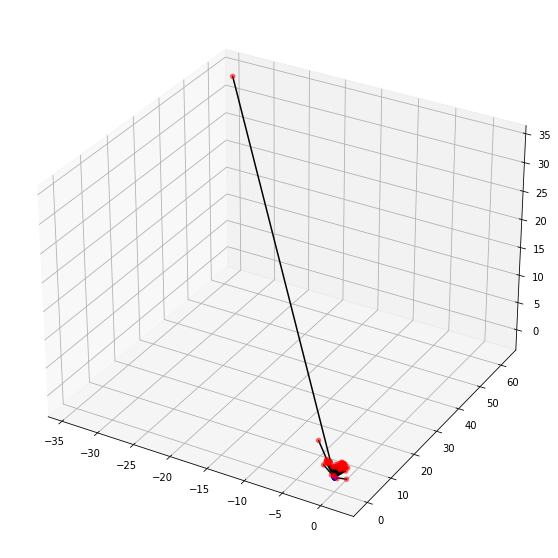

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pred[:50,0], pred[:50,1], pred[:50,2], color = 'r', alpha = 0.5)
ax.scatter(label[:50,0], label[:50,1], label[:50,2], color = 'b', alpha = 0.5)
# ax.plot3D([0,1],[0,1],[0,1])
# ax.plot3D([pred[:1,0][0],label[:1,0][0]],[pred[:1,1][0],label[:1,1][0]],[pred[:1,2][0],label[:1,2][0]])
for i in range(50):
    ax.plot3D([pred[i,0],label[i,0]],
               [pred[i,1],label[i,1]],
                [pred[i,2],label[i,2]],'black')


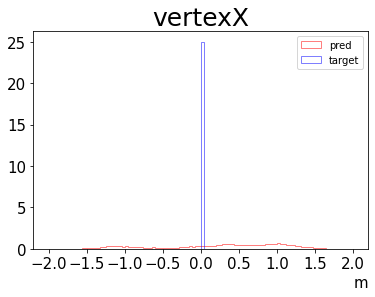

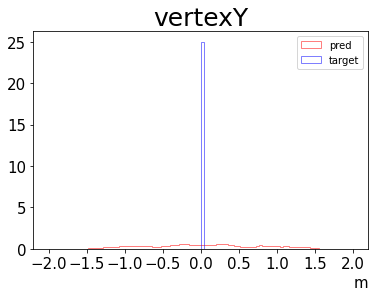

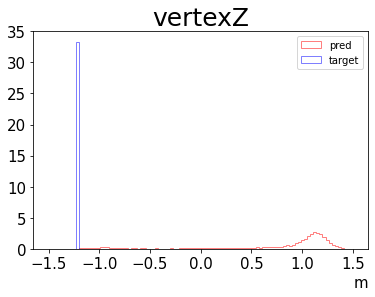

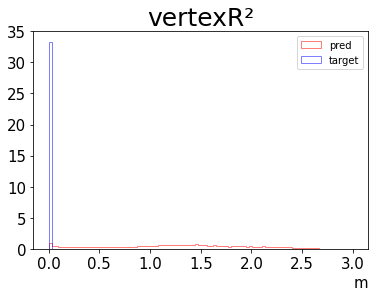

In [9]:
# if geo == 1:
    ######### jsns2 geo
plt.hist(pred[:,0], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,0], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.title('vertexX',fontsize = 25)
# plt.xlim([-0.0005,0])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()



plt.hist(pred[:,1], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,1], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.title('vertexY',fontsize = 25)
# plt.xlim([-0.00016,0])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()

plt.hist(pred[:,2], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()


plt.hist((pred[:,0]**2+pred[:,1]** 2), bins = 100, range = [0,3], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
plt.hist((label[:,0]**2+label[:,1]**2), bins = 100, range = [0,3], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.title('vertexR\u00b2',fontsize = 25)
# plt.xlim([-1,6])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


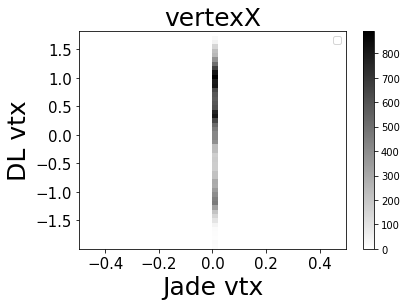

In [10]:
plt.hist2d(label[:,0][(pred[:,0]<2)&(pred[:,0]>-2)], pred[:,0][(pred[:,0]<2)&(pred[:,0]>-2)], bins = 50,cmap='binary')
# plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.title('vertexX',fontsize = 25)
# plt.xlim([-3,3])

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Jade vtx", fontsize=25)
plt.ylabel("DL vtx", fontsize=25)
plt.legend()
plt.colorbar()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


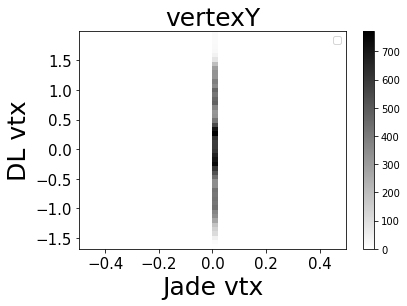

In [11]:
plt.hist2d(label[:,1][(pred[:,1]<2)&(pred[:,1]>-2)], pred[:,1][(pred[:,1]<2)&(pred[:,1]>-2)], bins = 50,cmap='binary')
# plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.title('vertexY',fontsize = 25)
# plt.xlim([-3,3])

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Jade vtx", fontsize=25)
plt.ylabel("DL vtx", fontsize=25)
plt.legend()
plt.colorbar()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


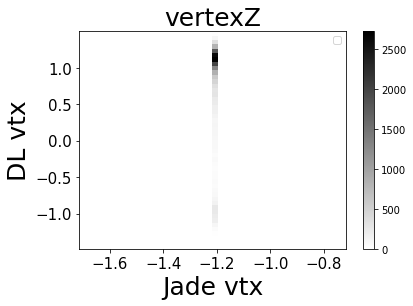

In [12]:
plt.hist2d(label[:,2][(pred[:,2]<1.5)&(pred[:,2]>-1.5)], pred[:,2][(pred[:,2]<1.5)&(pred[:,2]>-1.5)], bins = 50,cmap='binary')
# plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Jade vtx", fontsize=25)
plt.ylabel("DL vtx", fontsize=25)
plt.legend()
plt.colorbar()
plt.show()

/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


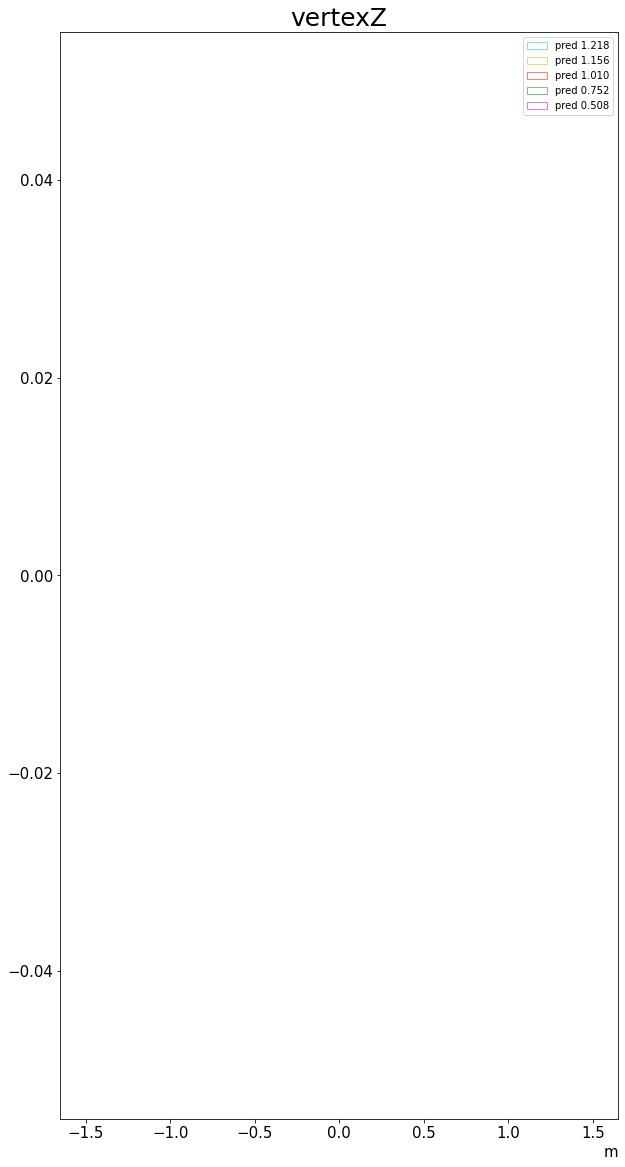

In [23]:
plt.hist(pred[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], bins = 100, range = [-1.5,1.5], color= 'c', alpha = 0.5, density = True, histtype = 'step',label = 'pred 1.218')
plt.hist(pred[:,2][(label[:,2]>0.15)&(label[:,2]<0.16)], bins = 100, range = [-1.5,1.5], color= 'y', alpha = 0.5, density = True, histtype = 'step',label = 'pred 1.156')

plt.hist(pred[:,2][(label[:,2]>1.00)&(label[:,2]<1.01)], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred 1.010')
plt.hist(pred[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'pred 0.752')
plt.hist(pred[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)], bins = 100, range = [-1.5,1.5], color= 'm', alpha = 0.5, density = True, histtype = 'step',label = 'pred 0.508')

# plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()

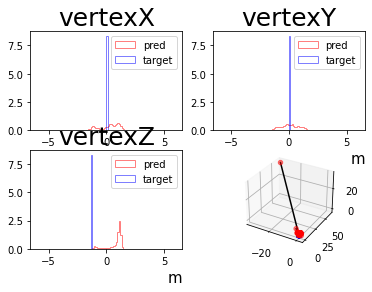

In [14]:
######### cylinder geo

ax1 = plt.subplot(2,2,1)
ax1.hist(pred[:,0], bins = 100, range = [-6,6], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
ax1.hist(label[:,0], bins = 100, range = [-6,6], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
ax1.set_title('vertexX',fontsize = 25)
# plt.xlim([-0.0005,0])
# ax1.set_xticks([-3,-2,-1,0,1,2,3],fontsize = 35)
# ax1.set_yticks(fontsize = 15)
ax1.set_xlabel("m", fontsize=15, loc='right')
ax1.legend(fontsize=10)



ax2 = plt.subplot(2,2,2)
ax2.hist(pred[:,1], bins = 100, range = [-6,6], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
ax2.hist(label[:,1], bins = 100, range = [-6,6], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
ax2.set_title('vertexY',fontsize = 25)
# plt.xlim([-0.00016,0])
# ax2.xticks(fontsize = 15)
# ax2.yticks(fontsize = 15)
ax2.set_xlabel("m", fontsize=15, loc='right')
ax2.legend(fontsize=10)

ax3 = plt.subplot(2,2,3)
ax3.hist(pred[:,2], bins = 100, range = [-6,6], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
ax3.hist(label[:,2], bins = 100, range = [-6,6], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
ax3.set_title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
# ax3.xticks(fontsize = 15)
# ax3.yticks(fontsize = 15)
ax3.set_xlabel("m", fontsize=15, loc='right')
ax3.legend(fontsize=10)


ax4 = plt.subplot(2,2,4, projection='3d')
ax4.scatter(pred[:50,0], pred[:50,1], pred[:50,2], color = 'r', alpha = 0.5)
ax4.scatter(label[:50,0], label[:50,1], label[:50,2], color = 'b', alpha = 0.5)
# ax.plot3D([0,1],[0,1],[0,1])
# ax.plot3D([pred[:1,0][0],label[:1,0][0]],[pred[:1,1][0],label[:1,1][0]],[pred[:1,2][0],label[:1,2][0]])
for i in range(50):
    ax4.plot3D([pred[i,0],label[i,0]],
               [pred[i,1],label[i,1]],
                [pred[i,2],label[i,2]],'black')

plt.show()

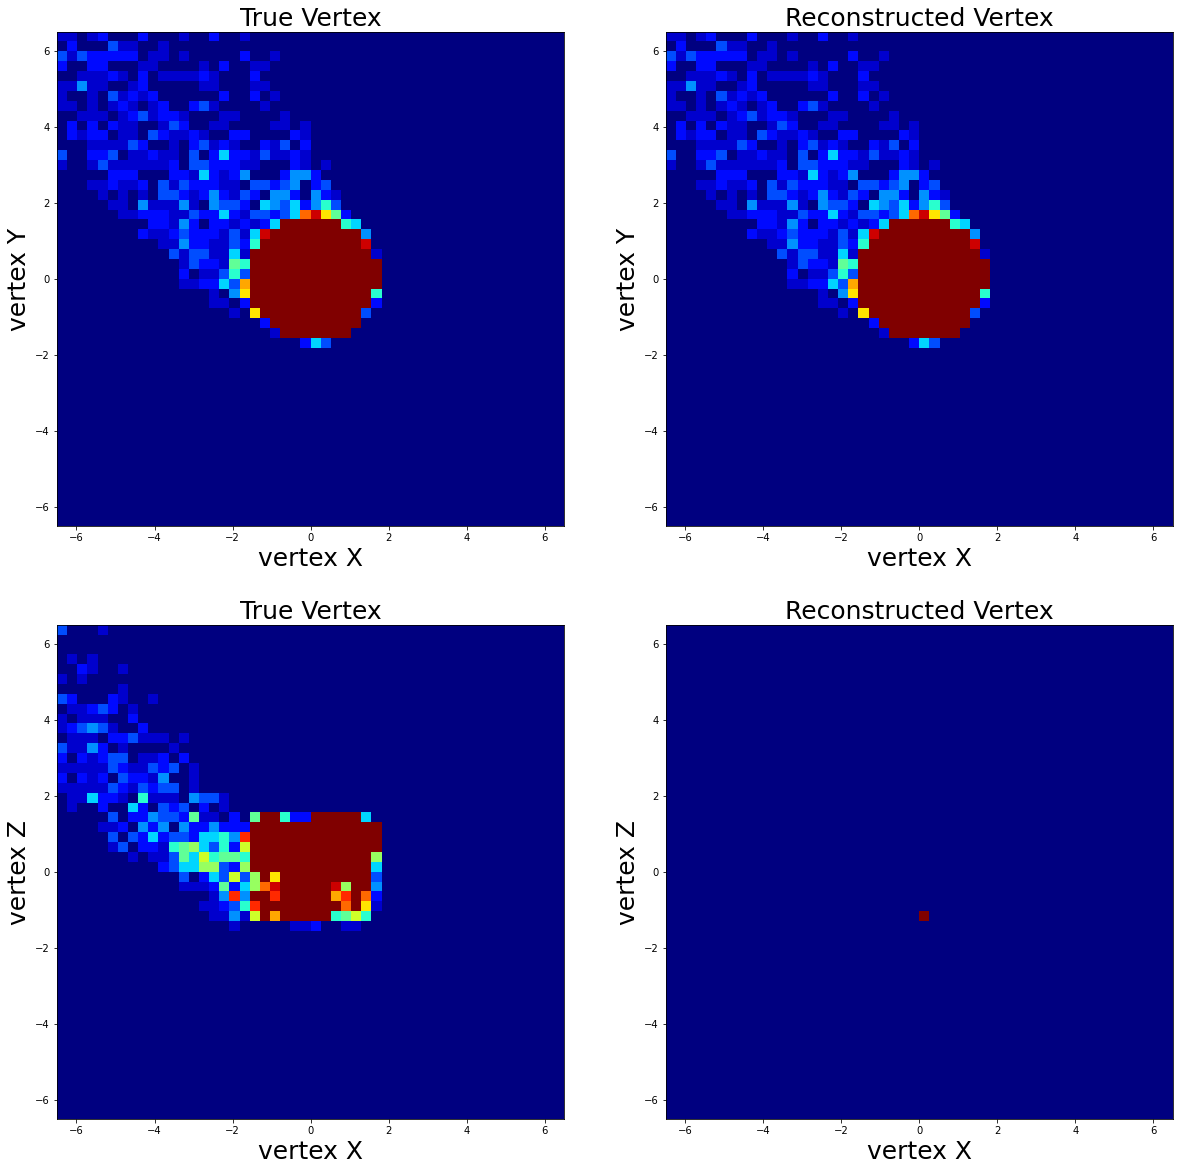

In [15]:
######### sphere geo
plt.rcParams['figure.figsize'] = (20, 20)
plt.subplot(2,2,1)
plt.hist2d(pred[:,0],pred[:,1], bins = (50,50),range=[[-6.5,6.5],[-6.5,6.5]],label = 'pred',cmap='jet',vmin=0,vmax=15)
plt.xlabel('vertex X',fontsize=25)
plt.ylabel('vertex Y',fontsize=25)
plt.title('True Vertex',fontsize=25)

plt.subplot(2,2,2)
plt.hist2d(pred[:,0],pred[:,1], bins = (50,50),range=[[-6.5,6.5],[-6.5,6.5]],label = 'pred',cmap='jet',vmin=0,vmax=15)
plt.xlabel('vertex X',fontsize=25)
plt.ylabel('vertex Y',fontsize=25)
plt.title('Reconstructed Vertex',fontsize=25)


plt.subplot(2,2,3)
plt.hist2d(pred[:,0],pred[:,2], bins = (50,50),range=[[-6.5,6.5],[-6.5,6.5]],label = 'pred',cmap='jet',vmin=0,vmax=15)
plt.xlabel('vertex X',fontsize=25)
plt.ylabel('vertex Z',fontsize=25)

plt.title('True Vertex',fontsize=25)

plt.subplot(2,2,4)
plt.hist2d(label[:,0],label[:,2], bins = (50,50),range=[[-6.5,6.5],[-6.5,6.5]],label = 'pred',cmap='jet',vmin=0,vmax=15)
plt.xlabel('vertex X',fontsize=25)
plt.ylabel('vertex Z',fontsize=25)
plt.title('Reconstructed Vertex',fontsize=25)
plt.show()



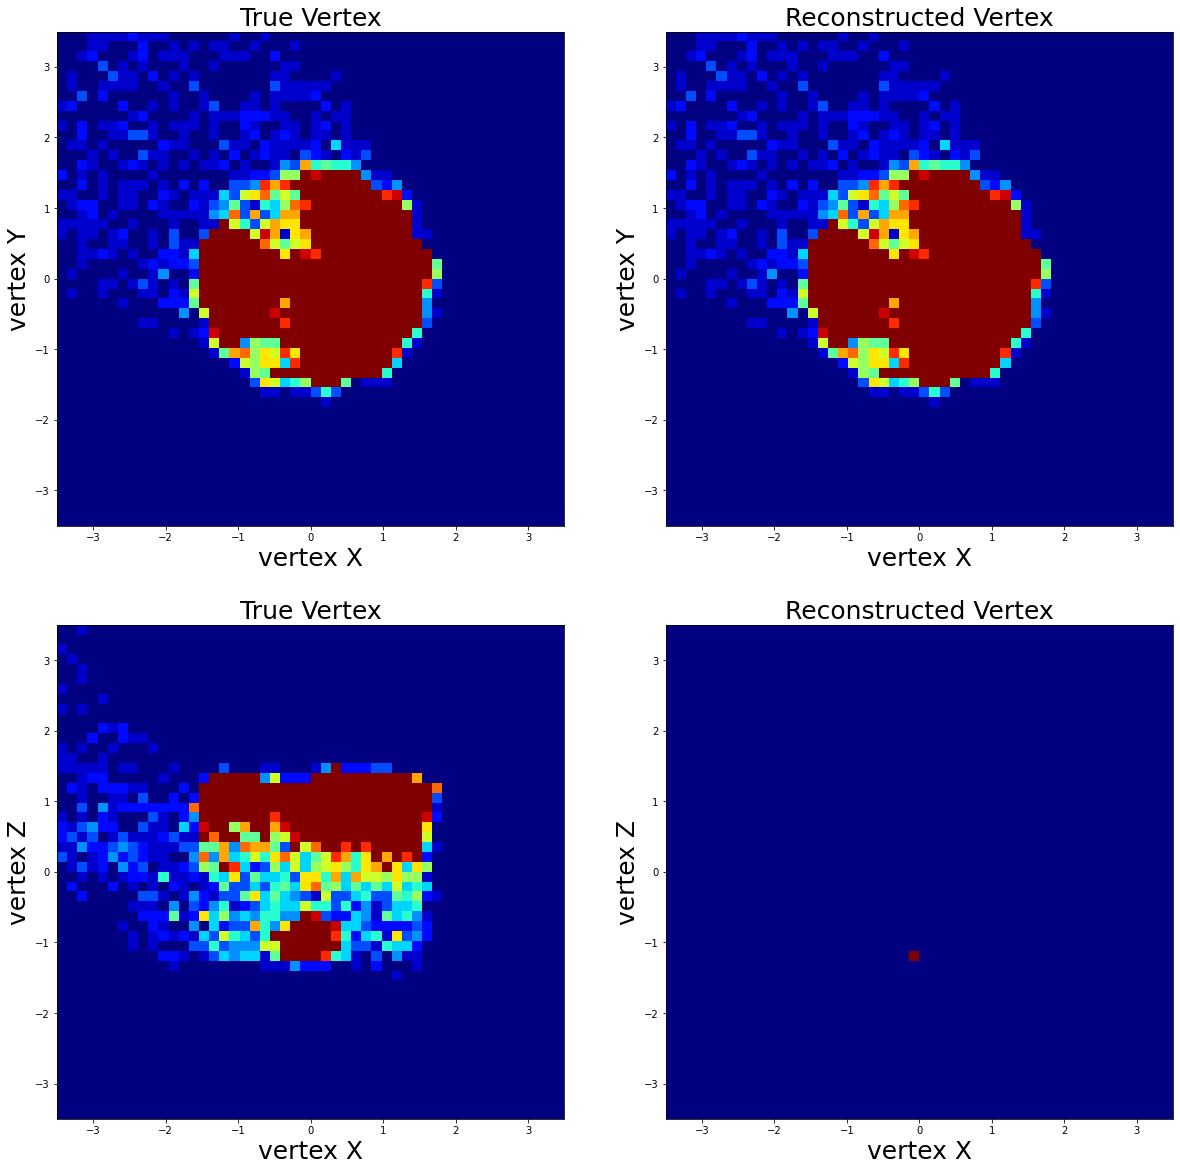

In [16]:
######### sphere geo
plt.rcParams['figure.figsize'] = (20, 20)
plt.subplot(2,2,1)
plt.hist2d(pred[:,0],pred[:,1], bins = (50,50),range=[[-3.5,3.5],[-3.5,3.5]],label = 'pred',cmap='jet',vmin=0,vmax=15)
plt.xlabel('vertex X',fontsize=25)
plt.ylabel('vertex Y',fontsize=25)
plt.title('True Vertex',fontsize=25)

plt.subplot(2,2,2)
plt.hist2d(pred[:,0],pred[:,1], bins = (50,50),range=[[-3.5,3.5],[-3.5,3.5]],label = 'pred',cmap='jet',vmin=0,vmax=15)
plt.xlabel('vertex X',fontsize=25)
plt.ylabel('vertex Y',fontsize=25)
plt.title('Reconstructed Vertex',fontsize=25)


plt.subplot(2,2,3)
plt.hist2d(pred[:,0],pred[:,2], bins = (50,50),range=[[-3.5,3.5],[-3.5,3.5]],label = 'pred',cmap='jet',vmin=0,vmax=15)
plt.xlabel('vertex X',fontsize=25)
plt.ylabel('vertex Z',fontsize=25)

plt.title('True Vertex',fontsize=25)

plt.subplot(2,2,4)
plt.hist2d(label[:,0],label[:,2], bins = (50,50),range=[[-3.5,3.5],[-3.5,3.5]],label = 'pred',cmap='jet',vmin=0,vmax=15)
plt.xlabel('vertex X',fontsize=25)
plt.ylabel('vertex Z',fontsize=25)
plt.title('Reconstructed Vertex',fontsize=25)
plt.show()



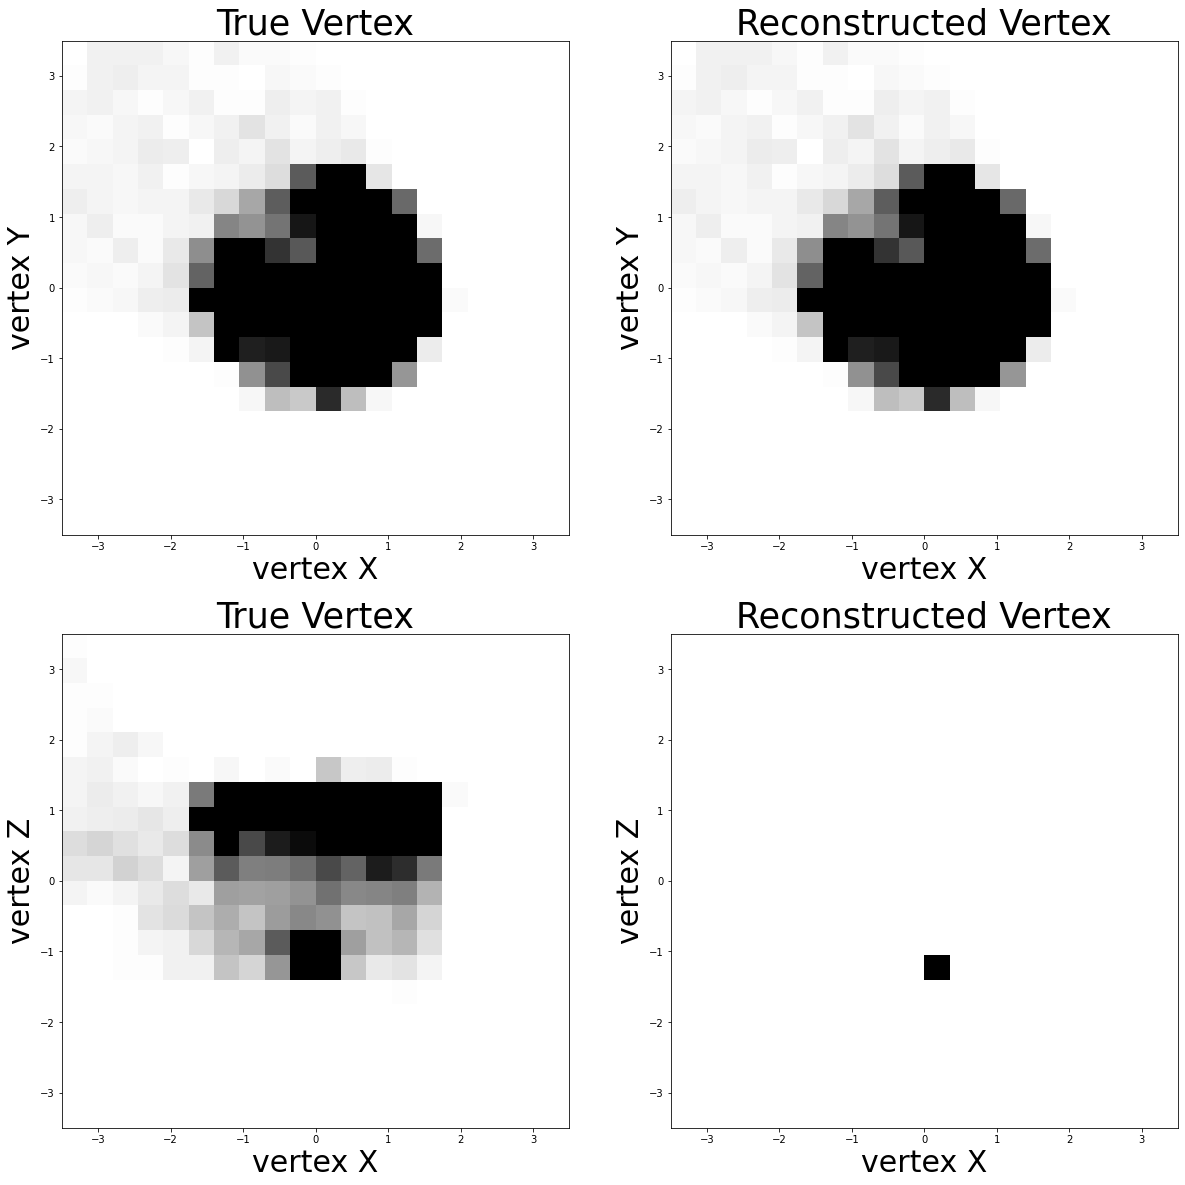

In [17]:
######### sphere geo

orig_map=plt.cm.get_cmap('gray')
  
# reversing the original colormap using reversed() function
r_map = orig_map.reversed()


plt.rcParams['figure.figsize'] = (20, 20)
plt.subplot(2,2,1)
plt.hist2d(pred[:,0],pred[:,1], bins = (20,20),range=[[-3.5,3.5],[-3.5,3.5]],label = 'pred',cmap=r_map,vmin=0,vmax=90)
plt.xlabel('vertex X',fontsize=30)
plt.ylabel('vertex Y',fontsize=30)
plt.title('True Vertex',fontsize=35)

plt.subplot(2,2,2)
plt.hist2d(pred[:,0],pred[:,1], bins = (20,20),range=[[-3.5,3.5],[-3.5,3.5]],label = 'pred',cmap=r_map,vmin=0,vmax=90)
plt.xlabel('vertex X',fontsize=30)
plt.ylabel('vertex Y',fontsize=30)
plt.title('Reconstructed Vertex',fontsize=35)


plt.subplot(2,2,3)
plt.hist2d(pred[:,0],pred[:,2], bins = (20,20),range=[[-3.5,3.5],[-3.5,3.5]],label = 'pred',cmap=r_map,vmin=0,vmax=90)
plt.xlabel('vertex X',fontsize=30)
plt.ylabel('vertex Z',fontsize=30)

plt.title('True Vertex',fontsize=35)

plt.subplot(2,2,4)
plt.hist2d(label[:,0],label[:,2], bins = (20,20),range=[[-3.5,3.5],[-3.5,3.5]],label = 'pred',cmap=r_map,vmin=0,vmax=90)
plt.xlabel('vertex X',fontsize=30)
plt.ylabel('vertex Z',fontsize=30)
plt.title('Reconstructed Vertex',fontsize=35)
plt.show()



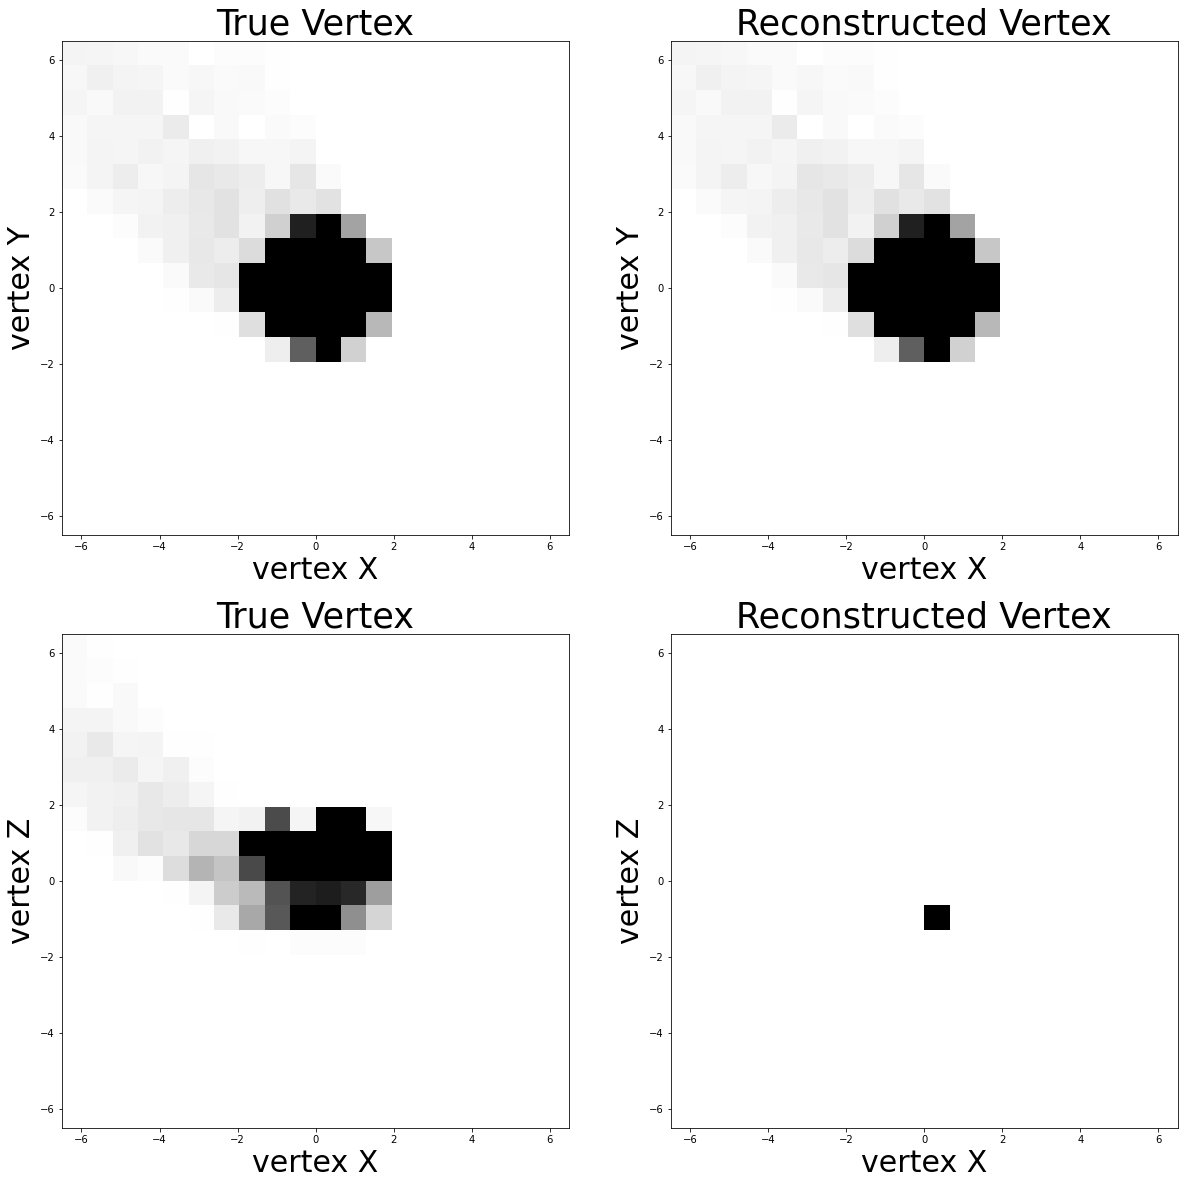

In [18]:
######### sphere geo

orig_map=plt.cm.get_cmap('gray')
  
# reversing the original colormap using reversed() function
r_map = orig_map.reversed()


plt.rcParams['figure.figsize'] = (20, 20)
plt.subplot(2,2,1)
plt.hist2d(pred[:,0],pred[:,1], bins = (20,20),range=[[-6.5,6.5],[-6.5,6.5]],label = 'pred',cmap=r_map,vmin=0,vmax=150)
plt.xlabel('vertex X',fontsize=30)
plt.ylabel('vertex Y',fontsize=30)
plt.title('True Vertex',fontsize=35)

plt.subplot(2,2,2)
plt.hist2d(pred[:,0],pred[:,1], bins = (20,20),range=[[-6.5,6.5],[-6.5,6.5]],label = 'pred',cmap=r_map,vmin=0,vmax=150)
plt.xlabel('vertex X',fontsize=30)
plt.ylabel('vertex Y',fontsize=30)
plt.title('Reconstructed Vertex',fontsize=35)


plt.subplot(2,2,3)
plt.hist2d(pred[:,0],pred[:,2], bins = (20,20),range=[[-6.5,6.5],[-6.5,6.5]],label = 'pred',cmap=r_map,vmin=0,vmax=150)
plt.xlabel('vertex X',fontsize=30)
plt.ylabel('vertex Z',fontsize=30)

plt.title('True Vertex',fontsize=35)

plt.subplot(2,2,4)
plt.hist2d(label[:,0],label[:,2], bins = (20,20),range=[[-6.5,6.5],[-6.5,6.5]],label = 'pred',cmap=r_map,vmin=0,vmax=150)
plt.xlabel('vertex X',fontsize=30)
plt.ylabel('vertex Z',fontsize=30)
plt.title('Reconstructed Vertex',fontsize=35)
plt.show()



/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


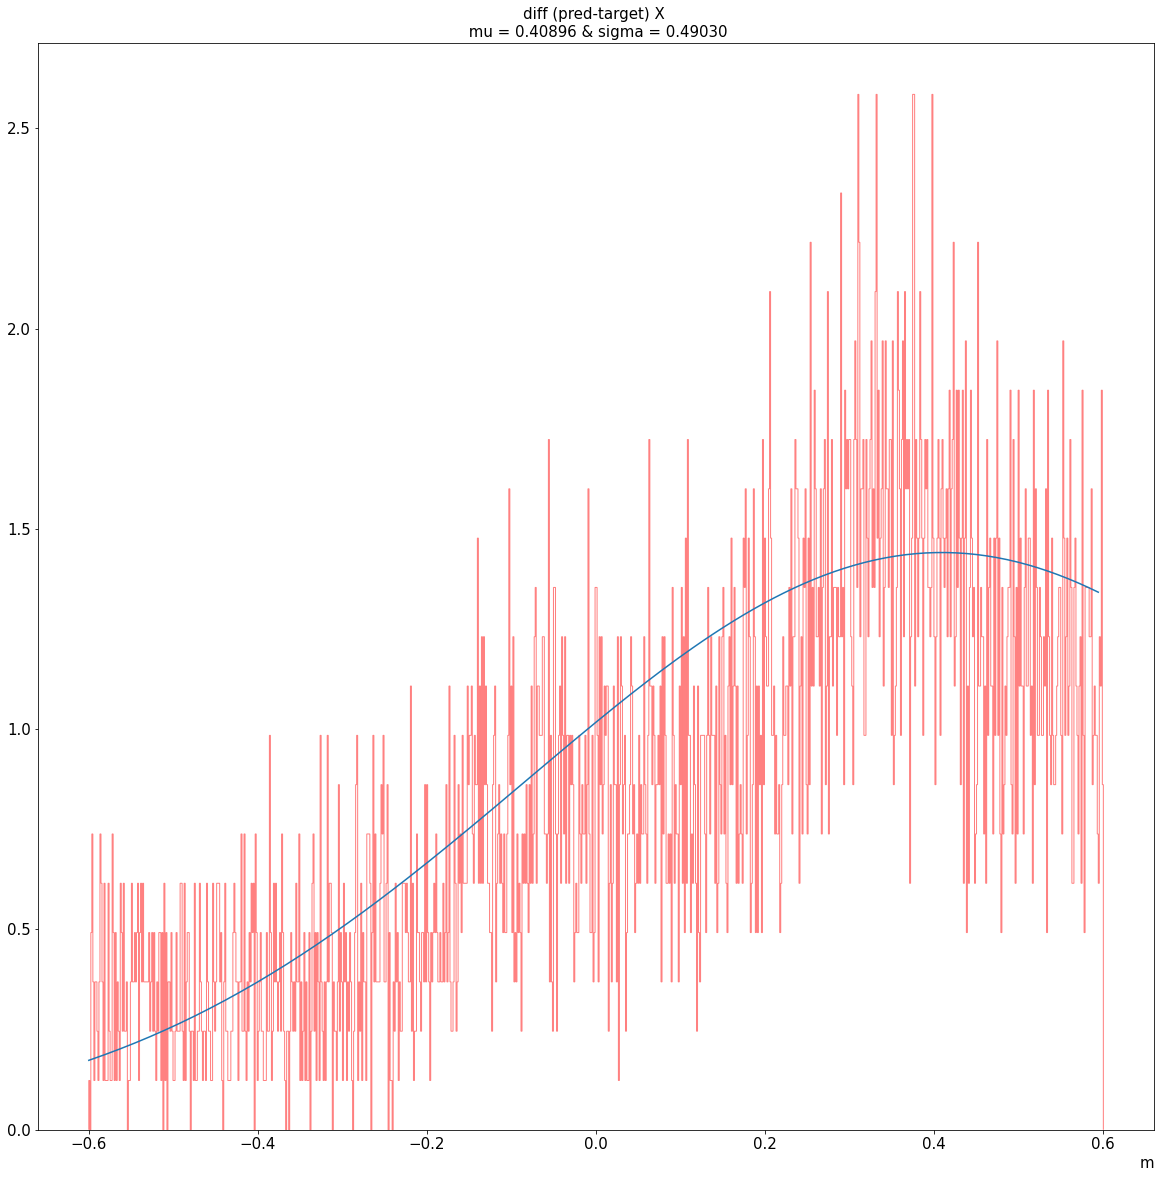

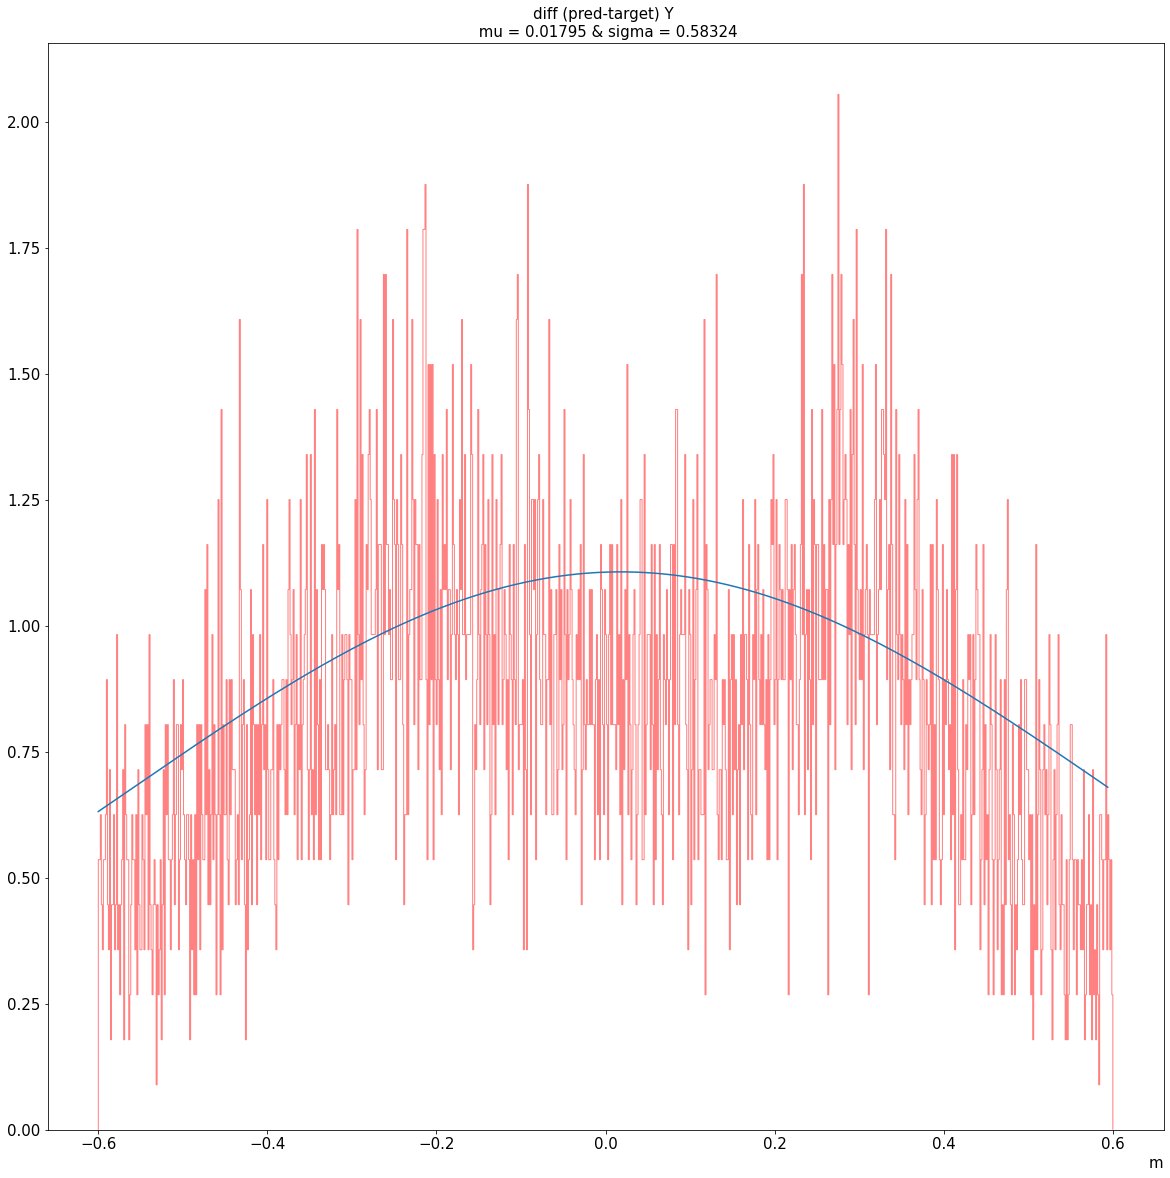

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in true_divide


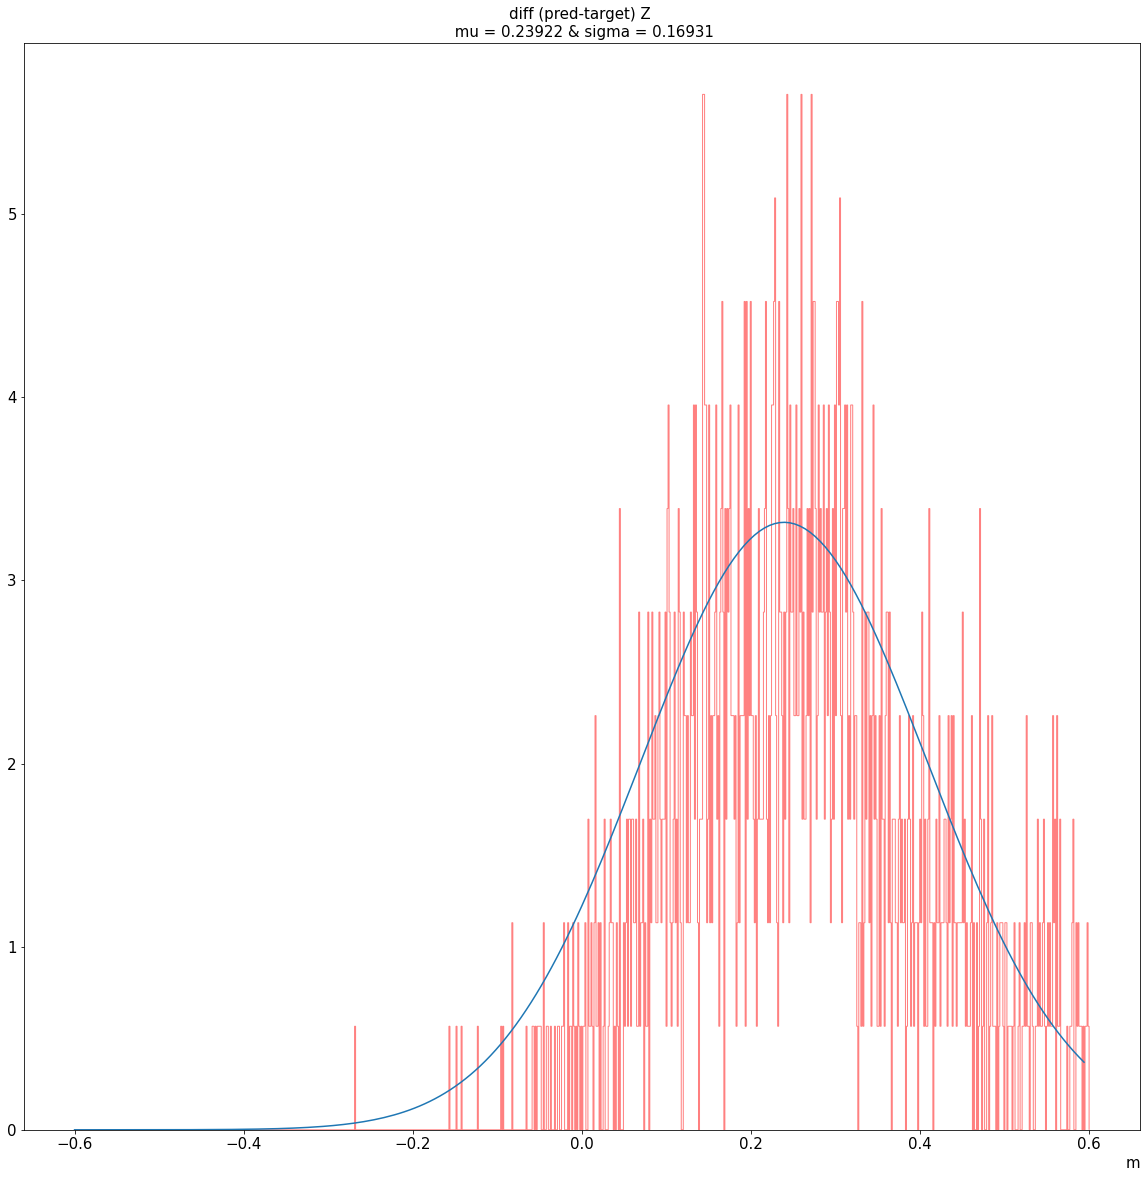

In [19]:
from scipy.optimize import curve_fit
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f

tmp_hist = plt.hist(pred[:,0] - label[:,0],bins = 1000, range = [-0.6,0.6], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.6, 0.6,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('diff (pred-target) X \n mu = ' + f"{popt[1]:.5f}"+' & sigma = ' +f"{np.abs(popt[2]):.5f}",fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.show()



tmp_hist = plt.hist(pred[:,1] - label[:,1],bins = 1000, range = [-0.6,0.6], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.6, 0.6,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('diff (pred-target) Y \n mu = ' + f"{popt[1]:.5f}"+' & sigma = ' +f"{np.abs(popt[2]):.5f}",fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.show()



tmp_hist = plt.hist(pred[:,2] - label[:,2],bins = 1000, range = [-0.6,0.6], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.6, 0.6,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('diff (pred-target) Z \n mu = ' + f"{popt[1]:.5f}"+' & sigma = ' +f"{np.abs(popt[2]):.5f}",fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

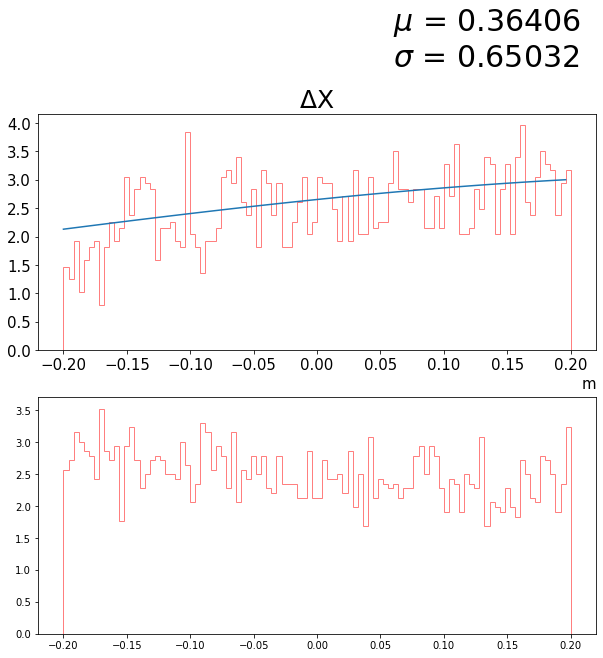

In [20]:
from scipy.optimize import curve_fit
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f
plt.rcParams['figure.figsize'] = (10, 20)
plt.subplot(4,1,1)
tmp_hist = plt.hist(pred[:,0] - label[:,0],bins = 100, range = [-0.2,0.2], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.2, 0.2,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$X',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.06,5,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(4,1,2)

tmp_hist = plt.hist(pred[:,1] - label[:,1],bins = 100, range = [-0.2,0.2], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.2, 0.2,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Y',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.06,5,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(4,1,3)
tmp_hist = plt.hist(pred[:,2] - label[:,2],bins = 100, range = [-0.2,0.2], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.2, 0.2,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Z',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.06,5,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')




### cylinder
# plt.subplot(4,1,4)
# x_new_GNN = [0.04268,0.04733,0.04192,0.04167,0.04481]
# y_new_GNN = [0.04969,0.05224,0.04718,0.04502,0.04712]
# z_new_GNN = [0.04132,0.05214,0.03610,0.04333,0.04058]

# Energy = [10,20,30,40,50]


# plt.plot(Energy,x_new_GNN,'.r',label=r'$\Delta$X',markersize=20)
# plt.plot(Energy,y_new_GNN,'.b',label=r'$\Delta$Y',markersize=20)
# plt.plot(Energy,z_new_GNN,'.g',label=r'$\Delta$Z',markersize=20)
# plt.grid()
# plt.ylim([0.02,0.06])
# plt.legend(loc='best')
# plt.yticks(fontsize=20)
# plt.xlabel("E(MeV)",fontsize=25)
# # plt.ylabel("gaussian fit sigma",fontsize=25)
# plt.show()


plt.show()



In [ ]:
from scipy.optimize import curve_fit
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f
plt.rcParams['figure.figsize'] = (10, 20)
plt.subplot(4,1,1)
tmp_hist = plt.hist(pred[:,0] - label[:,0],bins = 100, range = [-0.4,0.4], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.4, 0.4,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$X',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.12,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(4,1,2)

tmp_hist = plt.hist(pred[:,1] - label[:,1],bins = 100, range = [-0.4,0.4], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.4, 0.4,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Y',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.12,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(4,1,3)
tmp_hist = plt.hist(pred[:,2] - label[:,2],bins = 100, range = [-0.4,0.4], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.4, 0.4,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Z',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.12,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')




### cylinder
# plt.subplot(4,1,4)
# x_new_GNN = [0.04268,0.04733,0.04192,0.04167,0.04481]
# y_new_GNN = [0.04969,0.05224,0.04718,0.04502,0.04712]
# z_new_GNN = [0.04132,0.05214,0.03610,0.04333,0.04058]

# Energy = [10,20,30,40,50]



# plt.plot(Energy,x_new_GNN,'.r',label=r'$\Delta$X',markersize=20)
# plt.plot(Energy,y_new_GNN,'.b',label=r'$\Delta$Y',markersize=20)
# plt.plot(Energy,z_new_GNN,'.g',label=r'$\Delta$Z',markersize=20)
# plt.grid()
# plt.ylim([0.02,0.06])
# plt.legend(loc='best')
# plt.yticks(fontsize=20)
# plt.xlabel("E(MeV)",fontsize=25)
# plt.ylabel("gaussian fit sigma",fontsize=25)
# plt.show()


plt.show()



In [ ]:
from scipy.optimize import curve_fit
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f
plt.rcParams['figure.figsize'] = (10, 20)
plt.subplot(4,1,1)
tmp_hist = plt.hist(pred[:,0] - label[:,0],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.3, 0.3,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$X',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(4,1,2)

tmp_hist = plt.hist(pred[:,1] - label[:,1],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-0.3, 0.3,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Y',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(4,1,3)
tmp_hist = plt.hist(pred[:,2] - label[:,2],bins = 100, range = [-1.0,0.3], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-1.0, 0.3,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Z',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.text(-1,1.8,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=30)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')




### cylinder
# plt.subplot(4,1,4)
# x_new_GNN = [0.04268,0.04733,0.04192,0.04167,0.04481]
# y_new_GNN = [0.04969,0.05224,0.04718,0.04502,0.04712]
# z_new_GNN = [0.04132,0.05214,0.03610,0.04333,0.04058]

# Energy = [10,20,30,40,50]



# plt.plot(Energy,x_new_GNN,'.r',label=r'$\Delta$X',markersize=20)
# plt.plot(Energy,y_new_GNN,'.b',label=r'$\Delta$Y',markersize=20)
# plt.plot(Energy,z_new_GNN,'.g',label=r'$\Delta$Z',markersize=20)
# plt.grid()
# plt.ylim([0.02,0.06])
# plt.legend(loc='best')
# plt.yticks(fontsize=20)
# plt.xlabel("E(MeV)",fontsize=25)
# plt.ylabel("gaussian fit sigma",fontsize=25)
# plt.show()


plt.show()



In [ ]:
# _, bins, _ = plt.hist(pred[:,0] - label[:,0],bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step')
# mu, sigma = scipy.stats.norm.fit(pred[:,0] - label[:,0])
# best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
# plt.plot(bins, best_fit_line)
# plt.title('diff (pred-target) X \n mu = ' + f"{mu:.5f}"+' & sigma = ' +f"{sigma:.5f}",fontsize = 15)
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# plt.xlabel("m", fontsize=15, loc='right')
# plt.legend()
# plt.show()

# _, bins, _ = plt.hist((pred[:,1] - label[:,1]),bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step')
# mu, sigma = scipy.stats.norm.fit(pred[:,1] - label[:,1])
# best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
# plt.plot(bins, best_fit_line)
# plt.title('diff (pred-target) Y \n mu = ' + f"{mu:.5f}"+' & sigma = ' +f"{sigma:.5f}",fontsize = 15)
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# plt.xlabel("m", fontsize=15, loc='right')
# plt.legend()
# plt.show()

# _, bins, _ = plt.hist((pred[:,2] - label[:,2]),bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step')
# mu, sigma = scipy.stats.norm.fit(pred[:,2] - label[:,2])
# best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
# plt.plot(bins, best_fit_line)
# plt.title('diff (pred-target) Z \n mu = ' + f"{mu:.5f}"+' & sigma = ' +f"{sigma:.5f}",fontsize = 15)
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# plt.xlabel("m", fontsize=15, loc='right')
# plt.legend()
# plt.show()


In [ ]:
RR = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)

In [ ]:
plt.hist(RR,bins=100,range=[0,1], density = True, histtype = 'step')
plt.title('mse zoom',fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()
plt.hist(RR,bins=100, density = True, histtype = 'step')
plt.title('mse',fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
plt.plot(RR,'.r')
if geo == 1:
    plt.ylim([0,4])
elif geo == 2:
    plt.ylim([0,0.2])
elif geo == 3:
    plt.ylim([0,0.5])
plt.title('mse zoom',fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()
plt.plot(RR,'.r')
plt.title('mse',fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
reds = ['#FFFFFF','#FF0000']
red_cmap = LinearSegmentedColormap.from_list('my_cmap',reds)
red_cmap


In [ ]:
plt.plot(label[:,0],np.power((pred[:,0] - label[:,0]),2),'.r')
plt.xlabel("x[m]",fontsize=15)
plt.ylabel("MSE",fontsize=15)
plt.show()
plt.plot(label[:,1],np.power((pred[:,1] - label[:,1]),2),'.r')
plt.xlabel("y[m]",fontsize=15)
plt.ylabel("MSE",fontsize=15)
plt.show()
plt.plot(label[:,2],np.power((pred[:,2] - label[:,2]),2),'.r')
plt.xlabel("z[m]",fontsize=15)
plt.ylabel("MSE",fontsize=15)
plt.show()

In [ ]:
if geo == 1:
    plt.hist2d(label[:,0],np.power((pred[:,0] - label[:,0]),2),bins=(20,600),cmap='Reds')
    plt.title('X-MSE')
    plt.xlabel("x[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.05])
    plt.show()
    plt.hist2d(label[:,1],np.power((pred[:,1] - label[:,1]),2),bins=(20,600),cmap='Reds')
    plt.title('Y-MSE')
    plt.xlabel("y[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.05])
    plt.show()
    plt.hist2d(label[:,2],np.power((pred[:,2] - label[:,2]),2),bins=(20,600),cmap='Reds')
    plt.title('Z-MSE')
    plt.xlabel("z[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.05])
    plt.show()
elif geo == 2:

    plt.hist2d(label[:,0],np.power((pred[:,0] - label[:,0]),2),bins=(10,150),cmap='Reds')
    plt.title('X-MSE')
    plt.xlabel("x[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.01])
    plt.show()
    plt.hist2d(label[:,1],np.power((pred[:,1] - label[:,1]),2),bins=(10,150),cmap='Reds')
    plt.title('Y-MSE')
    plt.xlabel("y[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.01])
    plt.show()
    plt.hist2d(label[:,2],np.power((pred[:,2] - label[:,2]),2),bins=(10,150),cmap='Reds')
    plt.title('Z-MSE')
    plt.xlabel("z[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.01])
    plt.show()
elif geo == 3:

    plt.hist2d(label[:,0],np.power((pred[:,0] - label[:,0]),2),bins=(10,500),cmap='Reds')
    plt.title('X-MSE')
    plt.xlabel("x[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.01])
    plt.show()
    plt.hist2d(label[:,1],np.power((pred[:,1] - label[:,1]),2),bins=(10,1500),cmap='Reds')
    plt.title('Y-MSE')
    plt.xlabel("y[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.01])
    plt.show()
    plt.hist2d(label[:,2],np.power((pred[:,2] - label[:,2]),2),bins=(10,500),cmap='Reds')
    plt.title('Z-MSE')
    plt.xlabel("z[m]",fontsize=15)
    plt.ylabel("MSE",fontsize=15)
    plt.colorbar()
    plt.ylim([0,0.01])
    plt.show()

In [ ]:
if geo == 1:
    maxvalue = 5
elif geo == 2:
    maxvalue = 0.1
elif geo == 3:
    maxvalue = 1

R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,1):
    for i in range(0,26,1):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.1) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.1)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append(np.average(np.array(test)))
   

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,26)*100, cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-0.5, 25, 1))
ax.set_yticks(np.arange(-0.5, 23, 1))
ax.set_xticklabels(['0','0.1','0.2','0.3','0.4',
                    '0.5','0.6','0.7','0.8','0.9',
                    '1.0','1.1','1.2','1.3','1.4',
                    '1.5','1.6','1.7','1.8','1.9',
                    '2.0','2.1','2.2','2.3','2.4','2.5'],fontsize=20)
ax.set_yticklabels(['1.2','1.1','1.0','0.9','0.8',
                    '0.7','0.6','0.5','0.4','0.3',
                    '0.2','0.1','0','-0.1','-0.2',
                    '-0.3','-0.4','-0.5','-0.6','-0.7',
                    '-0.8','-0.9','-1.0','-1.2'],fontsize=15)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(24):
    for j in range(26):
        aaa = np.array(ME_eff).reshape(-1,26)[i, j]
        
        text = ax.text(j, i, f"{aaa*100:.2f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE avgerage",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



In [ ]:
if geo == 1:
    maxvalue = 5
elif geo == 2:
    maxvalue = 0.1
elif geo == 3:
    maxvalue = 1

R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,1):
    for i in range(0,26,1):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.1) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.1)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
#             ME_eff.append(np.average(np.array(test)))
            ME_eff.append(np.array(test).max())

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,26)*100, cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-0.5, 25, 1))
ax.set_yticks(np.arange(-0.5, 23, 1))
ax.set_xticklabels(['0','0.1','0.2','0.3','0.4',
                    '0.5','0.6','0.7','0.8','0.9',
                    '1.0','1.1','1.2','1.3','1.4',
                    '1.5','1.6','1.7','1.8','1.9',
                    '2.0','2.1','2.2','2.3','2.4','2.5'],fontsize=12)
ax.set_yticklabels(['1.2','1.1','1.0','0.9','0.8',
                    '0.7','0.6','0.5','0.4','0.3',
                    '0.2','0.1','0','-0.1','-0.2',
                    '-0.3','-0.4','-0.5','-0.6','-0.7',
                    '-0.8','-0.9','-1.0','-1.2'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(24):
    for j in range(26):
        aaa = np.array(ME_eff).reshape(-1,26)[i, j]
        
        text = ax.text(j, i, f"{aaa*100:.2f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE max",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



In [ ]:
if geo == 1:
    maxvalue = 5
elif geo == 2:
    maxvalue = 0.1
elif geo == 3:
    maxvalue = 1

R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,1):
    for i in range(0,26,1):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.1) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.1)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
#             ME_eff.append(np.average(np.array(test)))
            ME_eff.append(np.array(test).min())

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,26)*100, cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-0.5, 25, 1))
ax.set_yticks(np.arange(-0.5, 23, 1))
ax.set_xticklabels(['0','0.1','0.2','0.3','0.4',
                    '0.5','0.6','0.7','0.8','0.9',
                    '1.0','1.1','1.2','1.3','1.4',
                    '1.5','1.6','1.7','1.8','1.9',
                    '2.0','2.1','2.2','2.3','2.4','2.5'],fontsize=12)
ax.set_yticklabels(['1.2','1.1','1.0','0.9','0.8',
                    '0.7','0.6','0.5','0.4','0.3',
                    '0.2','0.1','0','-0.1','-0.2',
                    '-0.3','-0.4','-0.5','-0.6','-0.7',
                    '-0.8','-0.9','-1.0','-1.2'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(24):
    for j in range(26):
        aaa = np.array(ME_eff).reshape(-1,26)[i, j]
        
        text = ax.text(j, i, f"{aaa*100:.2f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE min",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



In [ ]:
if geo == 1:
    maxvalue = 0.05
elif geo == 2:
    maxvalue = 0.1
elif geo == 3:
    maxvalue = 1

R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,2):
    for i in range(0,26,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.2)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append(np.average(np.array(test)))
   

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,13), cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-.5, 12, 1))
ax.set_yticks(np.arange(-.5, 11, 1))
ax.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8','2.0','2.2','2.4'],fontsize=20)
ax.set_yticklabels(['1.2','1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8','-1.0'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(12):
    for j in range(13):
        aaa = np.array(ME_eff).reshape(-1,13)[i, j]
        text = ax.text(j, i, f"{aaa:.5f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE avgerage",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



In [ ]:


R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,2):
    for i in range(0,26,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.2)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append(np.array(test).max())
   

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,13), cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-.5, 12, 1))
ax.set_yticks(np.arange(-.5, 11, 1))
ax.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8','2.0','2.2','2.4'],fontsize=20)
ax.set_yticklabels(['1.2','1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8','-1.0'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(12):
    for j in range(13):
        aaa = np.array(ME_eff).reshape(-1,13)[i, j]
        text = ax.text(j, i, f"{aaa:.5f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE max",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



In [ ]:


R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,2):
    for i in range(0,26,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.2)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append(np.array(test).min())
   

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,13), cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-.5, 12, 1))
ax.set_yticks(np.arange(-.5, 11, 1))
ax.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8','2.0','2.2','2.4'],fontsize=20)
ax.set_yticklabels(['1.2','1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8','-1.0'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(12):
    for j in range(13):
        aaa = np.array(ME_eff).reshape(-1,13)[i, j]
        text = ax.text(j, i, f"{aaa:.5f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE min",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



In [ ]:
if geo == 1:
    maxvalue = 0.05
elif geo == 2:
    maxvalue = 0.1
elif geo == 3:
    maxvalue = 1

R2_mse = np.power((pred[:,0] - label[:,0]),2)+np.power((pred[:,1] - label[:,1]),2)+np.power((pred[:,2] - label[:,2]),2)
R2 = np.power(label[:,0],2)+np.power(label[:,1],2)
Z2 = np.array(label[:,2])
ME_eff = []
xx = []
yy = []
error = []

for j in range(-12,12,4):
    for i in range(0,28,4):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.4) & \
                    (j/10<= np.array(Z2)) & \
                    (np.array(Z2)<j/10+0.4)
        
        test = np.array(R2_mse)[isFiducial]

        if len(test) == 0:
            ME_eff.append(0)
       
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append(np.average(np.array(test)))
   

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.array(ME_eff).reshape(-1,7), cmap=red_cmap,vmin=0,vmax=maxvalue)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')


ax.set_xticks(np.arange(-.5, 6, 1))
ax.set_yticks(np.arange(-.5, 5, 1))
ax.set_xticklabels(['0','0.4','0.8','1.2','1.6','2.0','2.4'],fontsize=20)
ax.set_yticklabels(['1.2','0.8','0.4','0','-0.4','-0.8'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(6):
    for j in range(7):
        aaa = np.array(ME_eff).reshape(-1,7)[i, j]
        text = ax.text(j, i, f"{aaa:.5f}", ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("MSE avgerage",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()

